# Import Library: 분석에 사용할 모듈 설치
**1. Import Library**

In [91]:
!python -m pip install --user --upgrade pip

In [92]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

# Data Loading: 분석에 사용할 데이터 불러오기
**1. Import Library**  
**2. Data Loading**

In [93]:
# Regression Data (Using Library)
from sklearn.datasets import load_boston
raw = load_boston()
print(raw.DESCR)
print(raw.keys())
print(raw.data.shape, raw.target.shape)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [94]:
df_X = pd.DataFrame(raw.data, columns=raw.feature_names)
df_Y = pd.DataFrame(raw.target, columns=['Price'])
df_library = pd.concat([df_Y, df_X], axis=1)
df_library

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48


In [95]:
# Regression Data (Using Direct Location)
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,'18',2.31,'0',0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,'0',7.07,'0',0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,'0',7.07,'0',0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,'0',2.18,'0',0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,'0',2.18,'0',0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,'0',11.93,'0',0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,'0',11.93,'0',0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,'0',11.93,'0',0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,'0',11.93,'0',0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


# Preprocessing: 데이터 정리 및 패턴 추출하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   

## 자료형 변환

|   변수  |              설명              |
|:-------:|:------------------------------:|
|  Price  |            주택 가격           |
|   CRIM  |        1인당 범죄 발생률       |
|    ZN   |       주택용 토지의 비율       |
|  INDUS  |      비소매 상업지역 비율      |
|   CHAS  |    찰스강 인접 여부(인접=1)    |
|   NOX   |         일산화질소 농도        |
|    RM   |            방의 개수           |
|   AGE   | 1940년 이전에 건축된 주택 비율 |
|   DIS   |     주요 5대 회사와의 거리     |
|   RAD   |         고속도로 접근성        |
|   TAX   |             재산세             |
| PTRATIO |       교사와 학생의 비율       |
|    B    |         흑인 거주 비율         |
|  LSTAT  |          저소득층 비율         |

In [96]:
# 데이터 확인
# df.shape
# df.ndim
# df.head()
# df.tail()
# df.describe(include='all').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    object 
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    object 
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 55.5+ KB


In [97]:
col = []
if df['ZN'].dtype == 'object':
    for i in df['ZN']:
        col.append(float(i[1:-1]))
    df['ZN'] = col

col = []
if df['CHAS'].dtype == 'object':
    for i in df['CHAS']:
        col.append(float(i[1:-1]))
    df['CHAS'] = col

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1   CRIM     495 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    473 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       504 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      449 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        504 non-null    float64
 13  LSTAT    489 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 결측값 처리

In [99]:
# 결측값 확인
df.isnull()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [100]:
df.isnull().sum()

Price       0
CRIM       11
ZN          0
INDUS      33
CHAS        0
NOX         0
RM          2
AGE         0
DIS        57
RAD         0
TAX         0
PTRATIO     0
B           2
LSTAT      17
dtype: int64

In [101]:
!pip install missingno

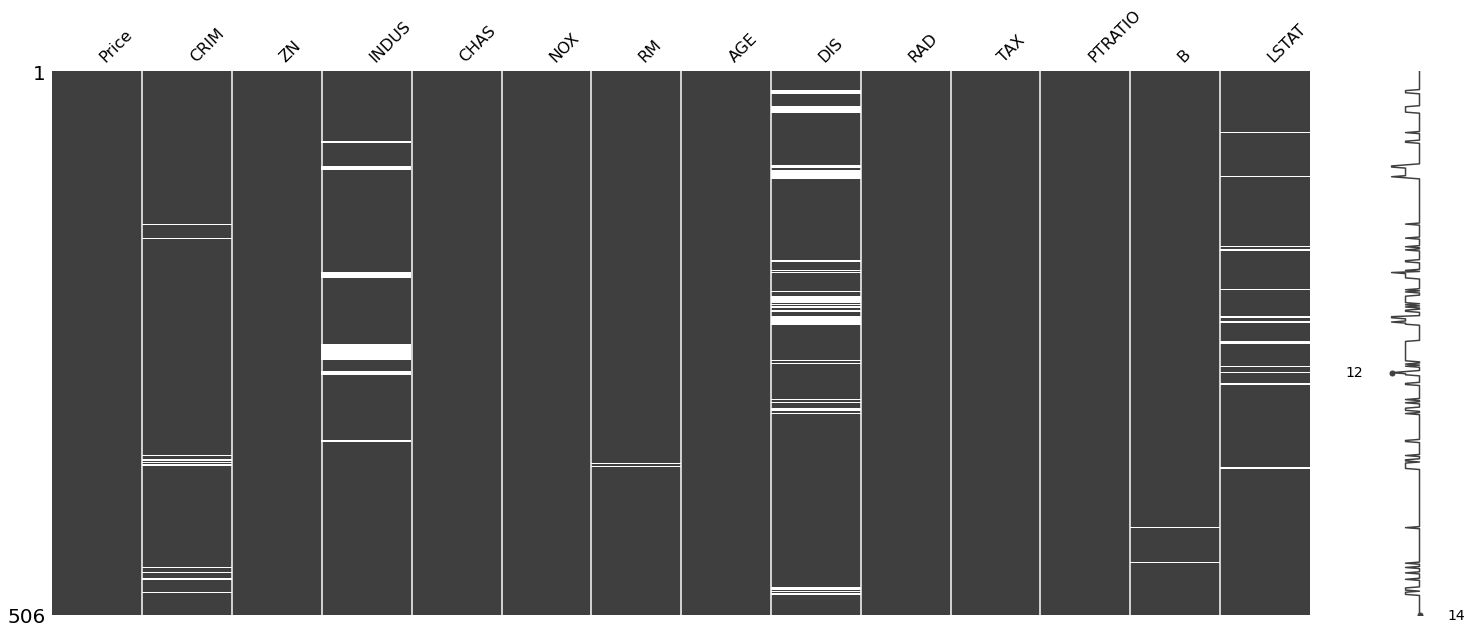

In [102]:
import missingno as msno

msno.matrix(df)
plt.show()

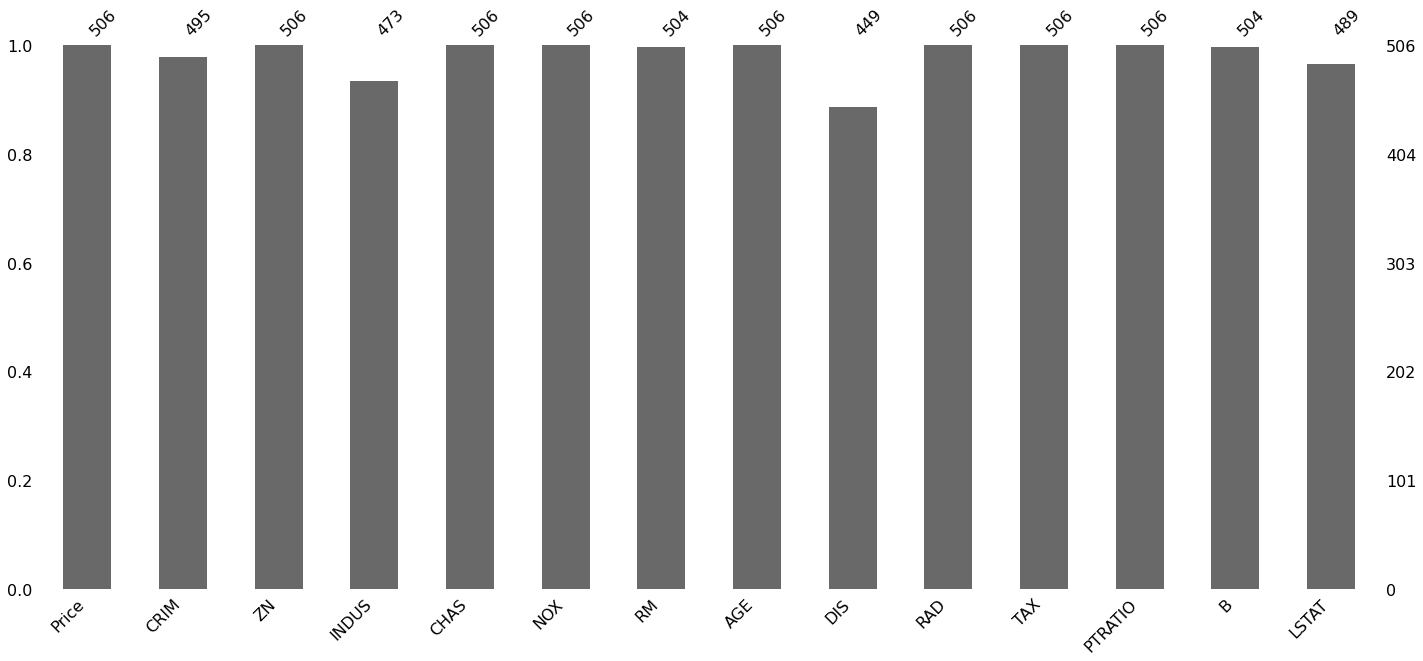

In [103]:
msno.bar(df)
plt.show()

In [104]:
df.dropna(axis=1)

,Price,ZN,CHAS,NOX,AGE,RAD,TAX,PTRATIO
0,24.00,18.00,0.00,0.54,65.20,1,296,15.30
1,21.60,0.00,0.00,0.47,78.90,2,242,17.80
2,34.70,0.00,0.00,0.47,61.10,2,242,17.80
3,33.40,0.00,0.00,0.46,45.80,3,222,18.70
4,36.20,0.00,0.00,0.46,54.20,3,222,18.70
...,...,...,...,...,...,...,...,...
501,22.40,0.00,0.00,0.57,69.10,1,273,21.00
502,20.60,0.00,0.00,0.57,76.70,1,273,21.00
503,23.90,0.00,0.00,0.57,91.00,1,273,21.00
504,22.00,0.00,0.00,0.57,89.30,1,273,21.00


In [105]:
df.dropna(axis=0)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [106]:
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


In [107]:
df.fillna(df.mean()).isnull().sum()

Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

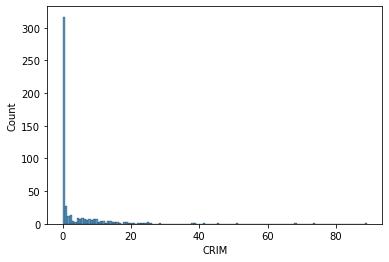

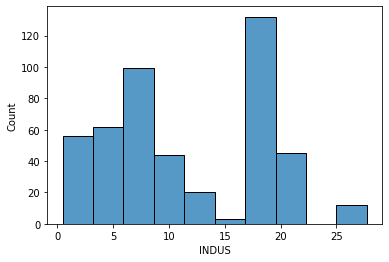

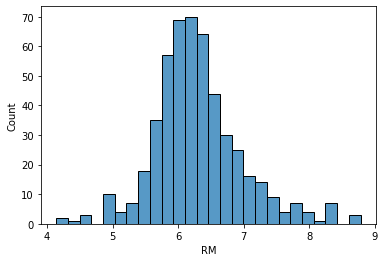

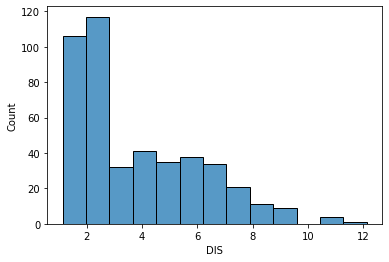

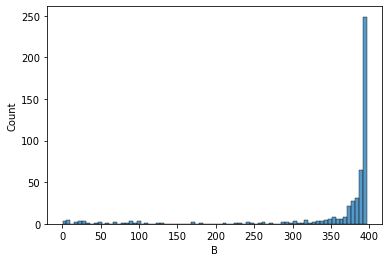

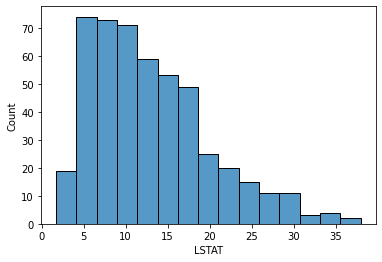

In [108]:
for i in df.columns[df.isnull().sum() != 0]:
    sns.histplot(data=df, x=i)
    plt.show()

In [109]:
for i in df.columns[df.isnull().sum() != 0]:
    if i not in ['INDUS', 'RM']:
        df[i].fillna(df[i].median(), inplace=True)
    else:
        df[i].fillna(df[i].mean(), inplace=True)

In [110]:
df.isnull().sum()

Price      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

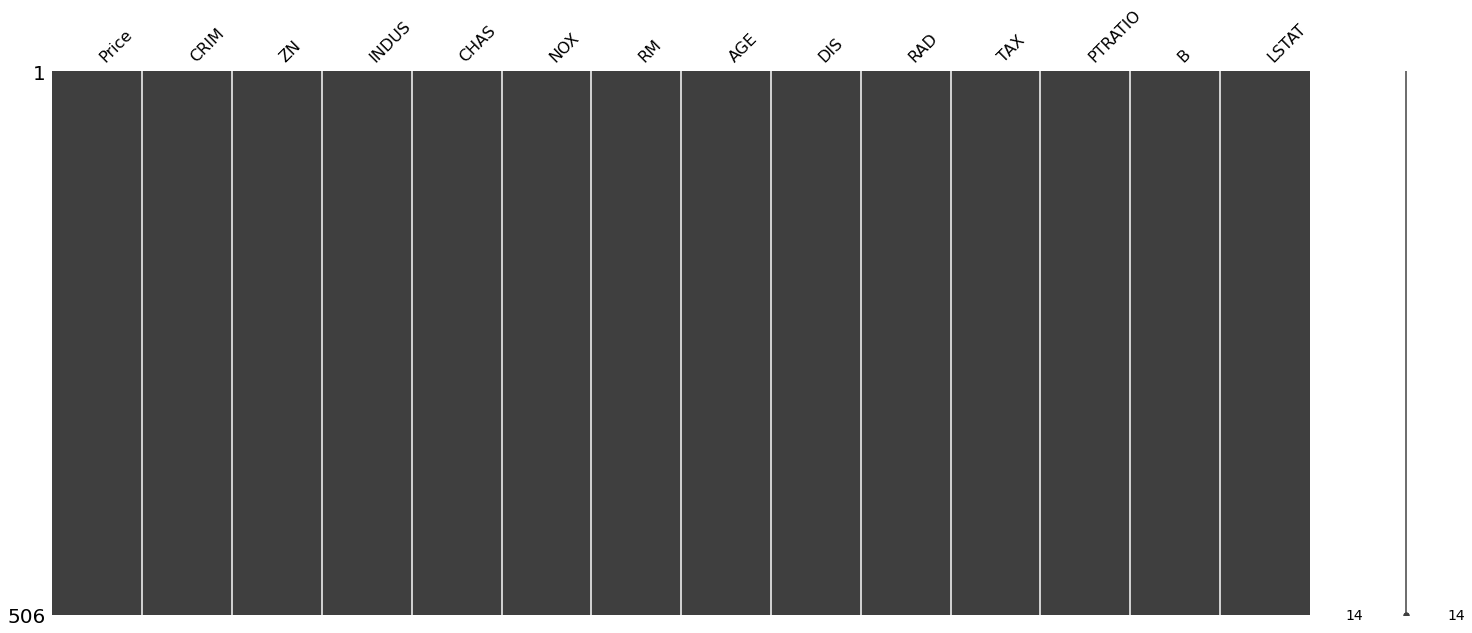

In [111]:
msno.matrix(df)
plt.show()

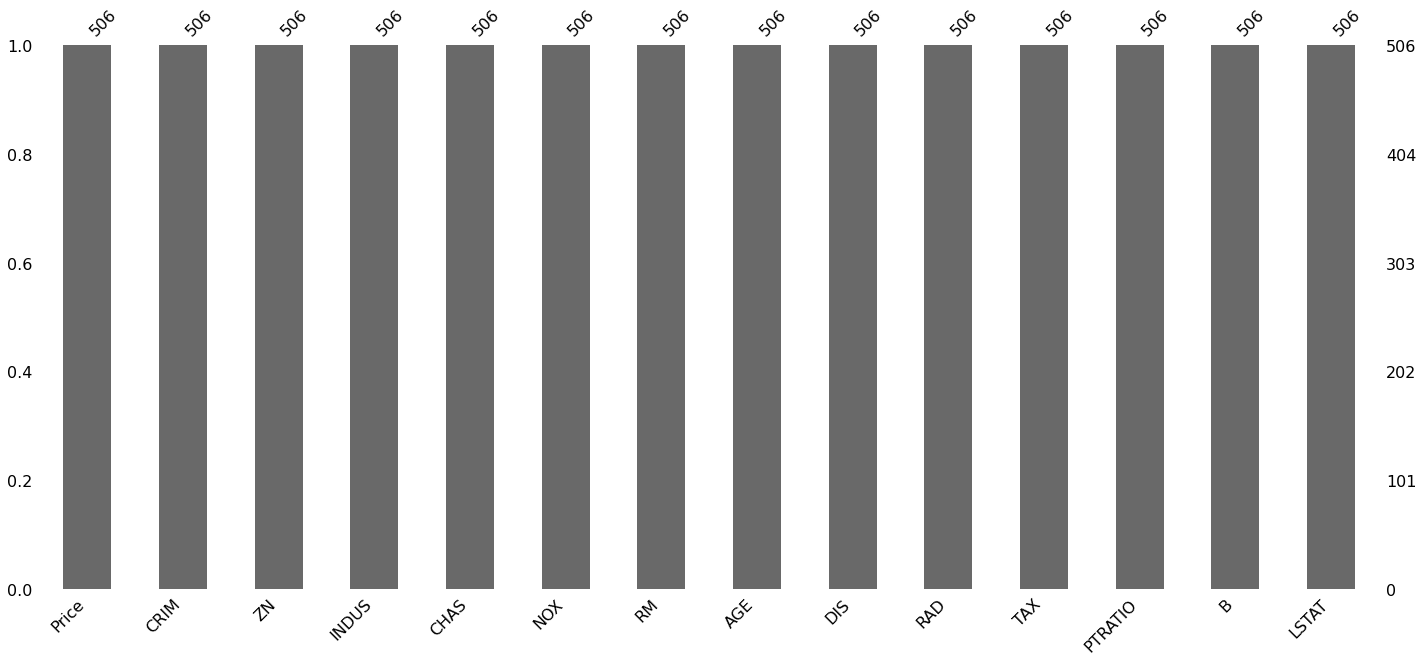

In [112]:
msno.bar(df)
plt.show()

## 이상치 처리

In [113]:
df.columns

Index(['Price', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

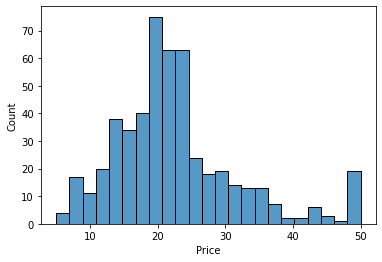

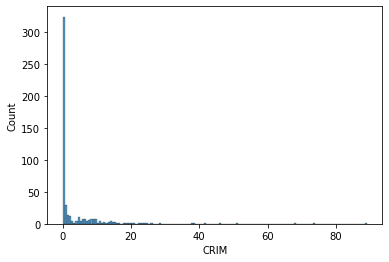

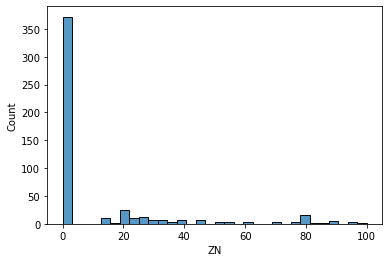

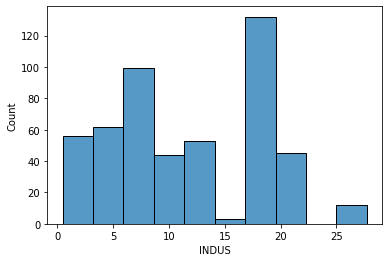

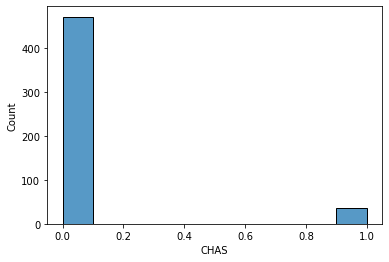

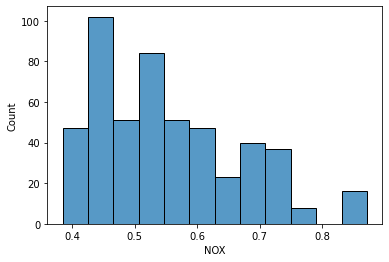

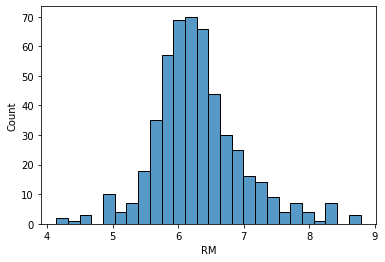

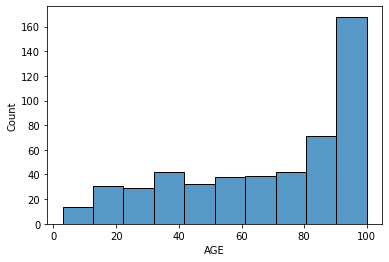

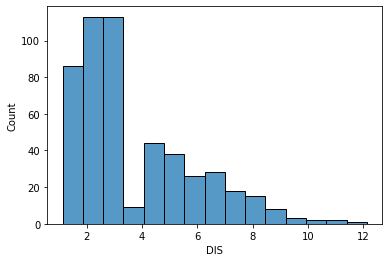

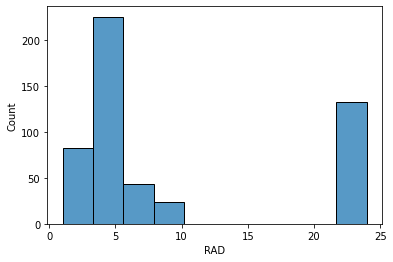

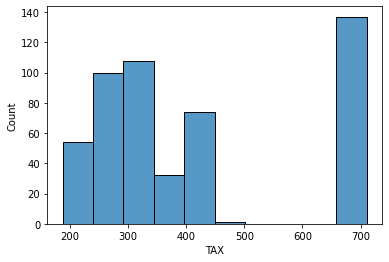

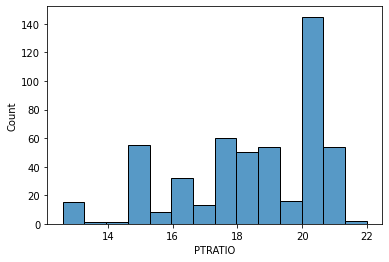

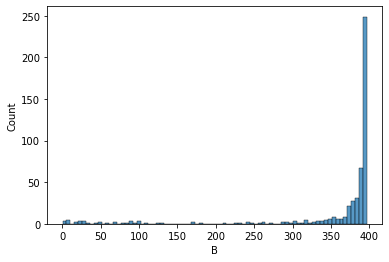

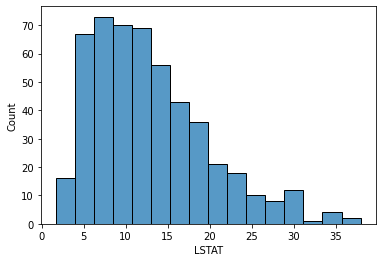

In [114]:
for i in df.columns:
    sns.histplot(data=df, x=i)
    plt.show()

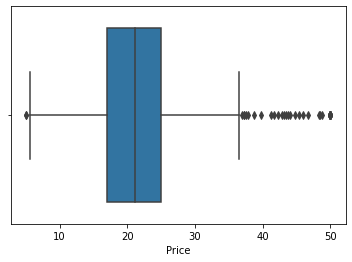

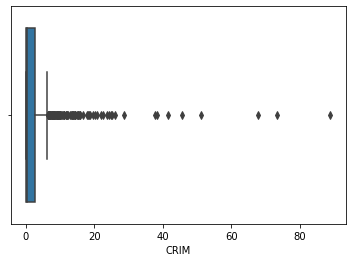

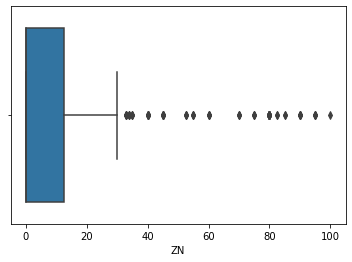

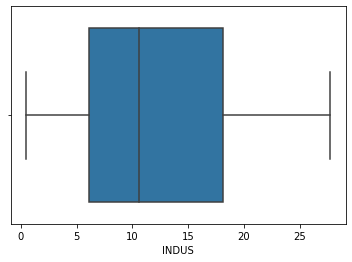

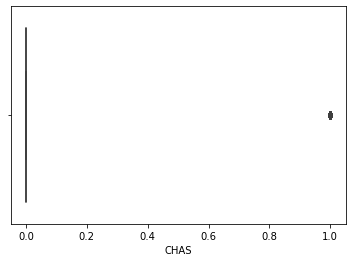

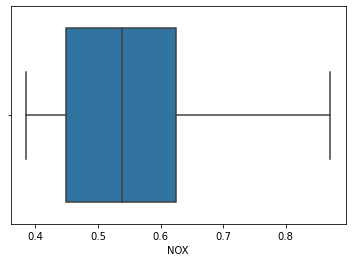

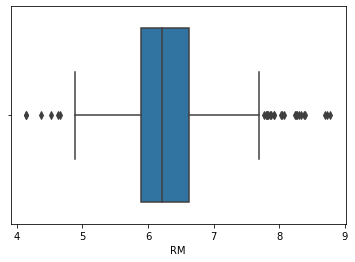

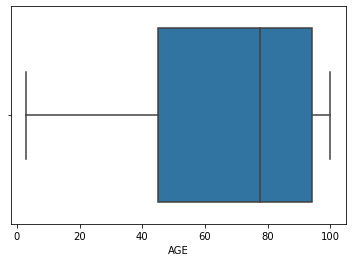

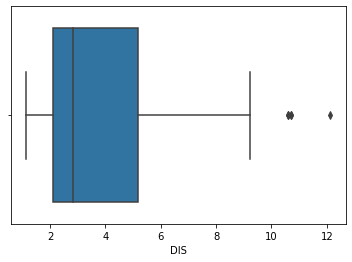

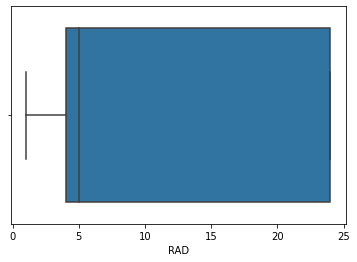

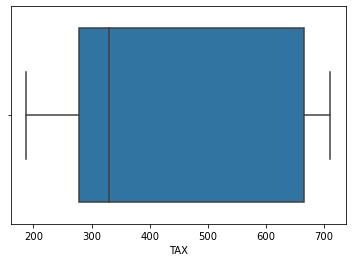

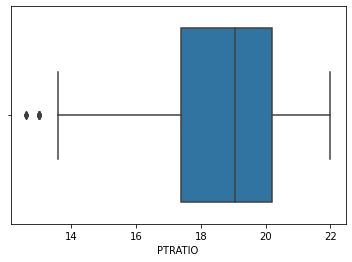

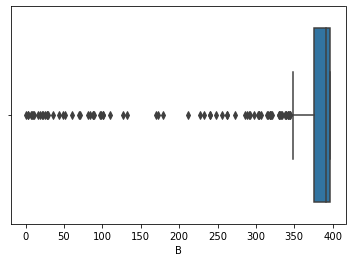

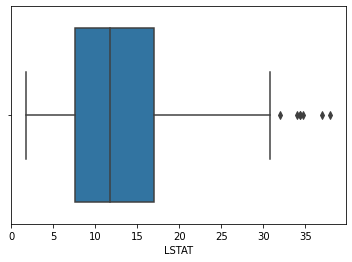

In [115]:
for i in df.columns:
#     sns.histplot(data=df, x=i)
    sns.boxplot(x=i, data=df)
    plt.show()

### Code Summary1

In [116]:
def prep(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df

In [117]:
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

df = prep(df)
df

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.00,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98
1,21.60,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14
2,34.70,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03
3,33.40,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94
4,36.20,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.40,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67
502,20.60,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08
503,23.90,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64
504,22.00,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48


## 데이터 분리

In [118]:
Y_colname = ['Price']
X_colname = [x for x in df.columns if x not in Y_colname]
Y_colname, X_colname

(['Price'],
 ['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'])

In [119]:
train_test_split(df[X_colname], df[Y_colname],
                 test_size=0.2, random_state=123)

[     CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS  RAD  TAX  PTRATIO      B  \
 203  0.04 95.00   2.68  0.00 0.42 7.85  33.20 5.12    4  224    14.70 392.78   
 441  9.72  0.00  18.10  0.00 0.74 6.41  97.20 2.07   24  666    20.20 385.96   
 172  0.14  0.00   4.05  0.00 0.51 5.57  88.50 2.60    5  296    16.60 396.90   
 95   0.12  0.00   2.89  0.00 0.45 6.62  57.80 3.82    2  276    18.00 357.98   
 54   0.01 75.00   4.00  0.00 0.41 5.89  47.60 7.32    3  469    21.10 396.90   
 ..    ...   ...    ...   ...  ...  ...    ...  ...  ...  ...      ...    ...   
 98   0.08  0.00   2.89  0.00 0.45 7.82  36.90 3.82    2  276    18.00 393.53   
 476  4.87  0.00  18.10  0.00 0.61 6.48  93.60 2.31   24  666    20.20 396.21   
 322  0.35  0.00   7.38  0.00 0.49 6.04  49.90 4.72    5  287    19.60 396.90   
 382  9.19  0.00  18.10  0.00 0.70 5.54 100.00 1.58   24  666    20.20 396.90   
 365  4.56  0.00  18.10  0.00 0.72 6.21  87.90 1.61   24  666    20.20 354.70   
 
      LSTAT  
 203  12.97 

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                    test_size=0.2, random_state=123)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [121]:
display(X_train, Y_train)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.04,95.00,2.68,0.00,0.42,7.85,33.20,5.12,4,224,14.70,392.78,12.97
441,9.72,0.00,18.10,0.00,0.74,6.41,97.20,2.07,24,666,20.20,385.96,19.52
172,0.14,0.00,4.05,0.00,0.51,5.57,88.50,2.60,5,296,16.60,396.90,14.69
95,0.12,0.00,2.89,0.00,0.45,6.62,57.80,3.82,2,276,18.00,357.98,6.65
54,0.01,75.00,4.00,0.00,0.41,5.89,47.60,7.32,3,469,21.10,396.90,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.00,0.45,7.82,36.90,3.82,2,276,18.00,393.53,12.97
476,4.87,0.00,18.10,0.00,0.61,6.48,93.60,2.31,24,666,20.20,396.21,18.68
322,0.35,0.00,7.38,0.00,0.49,6.04,49.90,4.72,5,287,19.60,396.90,7.70
382,9.19,0.00,18.10,0.00,0.70,5.54,100.00,1.58,24,666,20.20,396.90,23.60


,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


### Code Summary2

In [122]:
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [123]:
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

(404, 13) (404, 1)
(102, 13) (102, 1)


## 데이터 변환

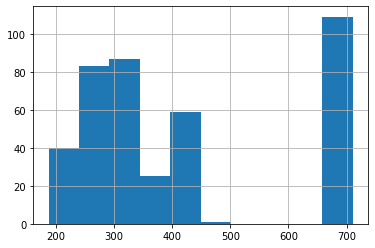

In [124]:
# Binning
X_train.TAX.hist()
plt.show()

In [125]:
X_train.TAX.describe()

count   404.00
mean    408.45
std     168.50
min     187.00
25%     279.00
50%     330.00
75%     666.00
max     711.00
Name: TAX, dtype: float64

In [126]:
interval = [100, 200, 300, 400, 500, 600, 700, 800]
np.digitize(X_train['TAX'], bins=interval)

array([2, 6, 2, 2, 4, 6, 3, 4, 4, 6, 4, 4, 6, 3, 2, 6, 4, 6, 6, 2, 2, 6,
       3, 1, 3, 2, 4, 4, 3, 6, 6, 6, 4, 6, 3, 6, 3, 6, 4, 1, 6, 3, 6, 6,
       1, 3, 2, 4, 6, 6, 2, 2, 1, 6, 6, 3, 6, 3, 3, 6, 3, 6, 6, 2, 6, 2,
       3, 4, 2, 4, 3, 3, 2, 1, 6, 2, 2, 2, 3, 3, 2, 4, 3, 2, 2, 2, 2, 3,
       3, 3, 6, 2, 3, 4, 6, 6, 4, 2, 3, 3, 4, 6, 4, 3, 2, 3, 6, 3, 2, 3,
       3, 3, 6, 2, 6, 6, 3, 2, 3, 7, 2, 4, 3, 2, 2, 3, 2, 4, 6, 6, 4, 6,
       4, 3, 2, 6, 2, 6, 2, 6, 2, 6, 6, 2, 6, 2, 3, 3, 6, 3, 2, 4, 6, 2,
       4, 7, 4, 6, 3, 2, 4, 3, 6, 2, 2, 2, 3, 3, 2, 2, 3, 6, 6, 6, 3, 4,
       3, 3, 4, 6, 6, 3, 4, 2, 6, 6, 3, 6, 2, 2, 2, 3, 3, 3, 3, 6, 2, 1,
       3, 4, 2, 4, 6, 4, 3, 2, 2, 6, 3, 1, 2, 3, 1, 6, 2, 6, 2, 2, 7, 2,
       6, 2, 3, 6, 4, 2, 2, 3, 2, 3, 6, 3, 6, 2, 6, 4, 3, 2, 3, 2, 6, 3,
       4, 6, 2, 6, 6, 3, 2, 3, 3, 2, 3, 4, 6, 3, 4, 2, 6, 2, 3, 2, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 6, 2, 2, 3, 6, 4, 3, 3, 2, 6, 4, 3, 4, 6, 2,
       3, 4, 3, 6, 3, 2, 2, 2, 3, 3, 2, 6, 6, 3, 3,

In [127]:
interval = [100, 200, 300, 400, 500, 600, 700, 800]
if X_train['TAX'].max() >= 100:
    X_train['TAX'] = np.digitize(X_train['TAX'], bins=interval)

X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,3.55,8.79,0.01,0.08,0.25,3.61,88.98
ZN,404.00,11.16,22.97,0.00,0.00,0.00,12.50,100.00
INDUS,404.00,11.56,6.70,0.46,5.96,9.90,18.10,27.74
CHAS,404.00,0.06,0.23,0.00,0.00,0.00,0.00,1.00
NOX,404.00,0.56,0.12,0.39,0.45,0.54,0.62,0.87
RM,404.00,6.29,0.68,4.14,5.89,6.21,6.62,8.72
AGE,404.00,68.97,28.02,6.00,45.32,77.70,94.10,100.00
DIS,404.00,3.81,2.14,1.17,2.10,3.10,5.12,12.13
RAD,404.00,9.51,8.66,1.00,4.00,5.00,24.00,24.00
TAX,404.00,3.59,1.65,1.00,2.00,3.00,6.00,7.00


In [128]:
pd.get_dummies(X_train['TAX'])

,1,2,3,4,6,7
203,0,1,0,0,0,0
441,0,0,0,0,1,0
172,0,1,0,0,0,0
95,0,1,0,0,0,0
54,0,0,0,1,0,0
...,...,...,...,...,...,...
98,0,1,0,0,0,0
476,0,0,0,0,1,0
322,0,1,0,0,0,0
382,0,0,0,0,1,0


In [129]:
pd.get_dummies(X_train['TAX'], prefix='TAX')

,TAX_1,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
203,0,1,0,0,0,0
441,0,0,0,0,1,0
172,0,1,0,0,0,0
95,0,1,0,0,0,0
54,0,0,0,1,0,0
...,...,...,...,...,...,...
98,0,1,0,0,0,0
476,0,0,0,0,1,0
322,0,1,0,0,0,0
382,0,0,0,0,1,0


In [130]:
pd.get_dummies(X_train['TAX'], prefix='TAX', drop_first=True)

,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
203,1,0,0,0,0
441,0,0,0,1,0
172,1,0,0,0,0
95,1,0,0,0,0
54,0,0,1,0,0
...,...,...,...,...,...
98,1,0,0,0,0
476,0,0,0,1,0
322,1,0,0,0,0
382,0,0,0,1,0


In [131]:
if 'TAX' in X_train.columns:
    df_dummy = pd.get_dummies(X_train['TAX'], prefix='TAX', drop_first=True)
    X_train = pd.concat([X_train, df_dummy], axis=1)
    del X_train['TAX']

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7
203,0.04,95.00,2.68,0.00,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0
441,9.72,0.00,18.10,0.00,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0
172,0.14,0.00,4.05,0.00,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0
95,0.12,0.00,2.89,0.00,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0
54,0.01,75.00,4.00,0.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.00,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0
476,4.87,0.00,18.10,0.00,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0
322,0.35,0.00,7.38,0.00,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0
382,9.19,0.00,18.10,0.00,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0


In [132]:
X_train['CHAS'].unique()

array([0., 1.])

In [133]:
X_train['CHAS'] = X_train['CHAS'].astype(int)
X_train['CHAS'].unique()

array([0, 1])

In [134]:
if 'CHAS' in X_train.columns:
    df_dummy = pd.get_dummies(X_train['CHAS'], prefix='CHAS', drop_first=False)
    X_train = pd.concat([X_train, df_dummy], axis=1)
    del X_train['CHAS']

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,3.55,8.79,0.01,0.08,0.25,3.61,88.98
ZN,404.00,11.16,22.97,0.00,0.00,0.00,12.50,100.00
INDUS,404.00,11.56,6.70,0.46,5.96,9.90,18.10,27.74
NOX,404.00,0.56,0.12,0.39,0.45,0.54,0.62,0.87
RM,404.00,6.29,0.68,4.14,5.89,6.21,6.62,8.72
AGE,404.00,68.97,28.02,6.00,45.32,77.70,94.10,100.00
DIS,404.00,3.81,2.14,1.17,2.10,3.10,5.12,12.13
RAD,404.00,9.51,8.66,1.00,4.00,5.00,24.00,24.00
PTRATIO,404.00,18.46,2.15,12.60,17.40,19.05,20.20,22.00
B,404.00,358.96,88.21,0.32,376.09,391.96,396.16,396.90


### Code Summary3

In [135]:
def feature_engineering(df_origin):
    df = df_origin.copy()
    
    # 데이터 변환
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 100:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)
        
    if 'TAX' in df.columns:
        df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
        df = pd.concat([df, df_dummy], axis=1)
        del df['TAX']

    df['CHAS'] = df['CHAS'].astype(int)
    if 'CHAS' in df.columns:
        df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
        df = pd.concat([df, df_dummy], axis=1)
        del df['CHAS']
    
    return df

In [136]:
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [137]:
display(X_train_fe, X_test_fe)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,CHAS_0,CHAS_1
410,51.14,0.00,18.10,0.60,5.76,100.00,1.41,24,20.20,2.60,10.11,0,0,0,1,1,0
85,0.06,0.00,4.49,0.45,6.63,56.10,4.44,3,18.50,392.30,6.53,1,0,0,0,1,0
280,0.04,20.00,9.90,0.44,7.82,64.50,4.69,5,14.90,387.31,12.97,1,0,0,0,1,0
422,12.05,0.00,18.10,0.61,5.65,87.60,1.95,24,20.20,291.55,14.10,0,0,0,1,1,0
199,0.03,95.00,1.47,0.40,6.97,15.30,7.65,3,17.00,396.90,4.56,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.50,6.55,21.40,3.82,8,17.40,380.34,12.97,0,1,0,0,1,0
159,1.43,0.00,19.58,0.87,6.51,100.00,1.77,5,14.70,364.31,7.39,0,0,1,0,1,0
196,0.04,80.00,1.52,0.40,7.29,34.10,7.31,2,12.60,396.90,4.08,0,1,0,0,1,0
345,0.03,0.00,4.39,0.44,6.01,48.50,8.01,3,18.80,385.64,10.53,0,1,0,0,1,0


In [138]:
def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # checking the difference of columns
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # duplicates
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te  

In [139]:
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe) 

(404, 13) (404, 1)
(102, 13) (102, 1)


In [140]:
display(X_train_fe, X_test_fe)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,51.14,0.00,18.10,0.60,5.76,100.00,1.41,24,20.20,2.60,10.11,0,0,0,1,0,1,0
85,0.06,0.00,4.49,0.45,6.63,56.10,4.44,3,18.50,392.30,6.53,1,0,0,0,0,1,0
280,0.04,20.00,9.90,0.44,7.82,64.50,4.69,5,14.90,387.31,12.97,1,0,0,0,0,1,0
422,12.05,0.00,18.10,0.61,5.65,87.60,1.95,24,20.20,291.55,14.10,0,0,0,1,0,1,0
199,0.03,95.00,1.47,0.40,6.97,15.30,7.65,3,17.00,396.90,4.56,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.50,6.55,21.40,3.82,8,17.40,380.34,12.97,0,1,0,0,0,1,0
159,1.43,0.00,19.58,0.87,6.51,100.00,1.77,5,14.70,364.31,7.39,0,0,1,0,0,1,0
196,0.04,80.00,1.52,0.40,7.29,34.10,7.31,2,12.60,396.90,4.08,0,1,0,0,0,1,0
345,0.03,0.00,4.39,0.44,6.01,48.50,8.01,3,18.80,385.64,10.53,0,1,0,0,0,1,0


## 스케일 조정

```python
preprocessing.StandardScaler()
preprocessing.MinMaxScaler()
preprocessing.RobustScaler()
preprocessing.Normalizer()
```

In [141]:
X_train_fe

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


In [142]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train_fe)
scaler_fit.transform(X_train_fe)

array([[3.23480261e-04, 9.50000000e-01, 8.13782991e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.09226403e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.49286478e-03, 0.00000000e+00, 1.31598240e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.87569366e-03, 0.00000000e+00, 2.53665689e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.03188854e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.11358451e-02, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [143]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train_fe)
pd.DataFrame(scaler_fit.transform(X_train_fe))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
400,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
401,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
402,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [144]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train_fe)
pd.DataFrame(scaler_fit.transform(X_train_fe), columns=X_train_fe.columns)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
0,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
400,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
401,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
402,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [145]:
scaler_fit.transform(X_test_fe)

array([[5.74683028e-01, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.73564896e-04, 0.00000000e+00, 1.47727273e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.31123297e-04, 2.00000000e-01, 3.46041056e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.79791453e-04, 8.00000000e-01, 3.88563050e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.78858418e-04, 0.00000000e+00, 1.44061584e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.96343257e-02, 0.00000000e+00, 6.46627566e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [146]:
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train_fe)
X_train_fes = pd.DataFrame(scaler_fit.transform(X_train_fe), 
                           index=X_train_fe.index, columns=X_train_fe.columns)
X_test_fes = pd.DataFrame(scaler_fit.transform(X_test_fe), 
                          index=X_test_fe.index, columns=X_test_fe.columns)

In [147]:
display(X_train_fes, X_test_fes)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.35,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.24,0.30,0.51,0.96,0.32,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


### Code Summary4

In [148]:
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [149]:
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [150]:
display(X_train_fes, X_test_fes)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.35,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.24,0.30,0.51,0.96,0.32,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [151]:
display(X_train_fes.describe().T, X_test_fes.describe().T)

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,0.04,0.10,0.00,0.00,0.00,0.04,1.00
ZN,404.00,0.11,0.23,0.00,0.00,0.00,0.12,1.00
INDUS,404.00,0.41,0.25,0.00,0.20,0.35,0.65,1.00
NOX,404.00,0.35,0.24,0.00,0.14,0.31,0.49,1.00
RM,404.00,0.47,0.15,0.00,0.38,0.45,0.54,1.00
AGE,404.00,0.67,0.30,0.00,0.42,0.76,0.94,1.00
DIS,404.00,0.24,0.19,0.00,0.08,0.18,0.36,1.00
RAD,404.00,0.37,0.38,0.00,0.13,0.17,1.00,1.00
PTRATIO,404.00,0.62,0.23,0.00,0.51,0.69,0.81,1.00
B,404.00,0.90,0.22,0.00,0.95,0.99,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
CRIM,102.00,0.04,0.09,0.00,0.00,0.00,0.04,0.57
ZN,102.00,0.12,0.25,0.00,0.00,0.00,0.12,0.95
INDUS,102.00,0.40,0.22,0.03,0.24,0.35,0.65,0.92
NOX,102.00,0.34,0.24,0.01,0.13,0.31,0.49,1.00
RM,102.00,0.47,0.15,0.00,0.38,0.46,0.55,1.01
AGE,102.00,0.65,0.31,-0.03,0.40,0.74,0.93,1.00
DIS,102.00,0.25,0.18,-0.00,0.09,0.24,0.38,0.69
RAD,102.00,0.38,0.39,0.00,0.13,0.17,1.00,1.00
PTRATIO,102.00,0.62,0.24,0.00,0.48,0.69,0.81,0.91
B,102.00,0.89,0.23,0.01,0.92,0.98,1.00,1.00


## Code Summary

In [152]:
def prep(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


def feature_engineering(df_origin):
    df = df_origin.copy()
    
    # 데이터 변환
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 100:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)
        
    if 'TAX' in df.columns:
        df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
        df = pd.concat([df, df_dummy], axis=1)
        del df['TAX']

    df['CHAS'] = df['CHAS'].astype(int)
    if 'CHAS' in df.columns:
        df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
        df = pd.concat([df, df_dummy], axis=1)
        del df['CHAS']
    
    return df


def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # checking the difference of columns
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # duplicates
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling

In [153]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [154]:
display(X_train, X_test)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.04,95.00,2.68,0.00,0.42,7.85,33.20,5.12,4,224,14.70,392.78,12.97
441,9.72,0.00,18.10,0.00,0.74,6.41,97.20,2.07,24,666,20.20,385.96,19.52
172,0.14,0.00,4.05,0.00,0.51,5.57,88.50,2.60,5,296,16.60,396.90,14.69
95,0.12,0.00,2.89,0.00,0.45,6.62,57.80,3.82,2,276,18.00,357.98,6.65
54,0.01,75.00,4.00,0.00,0.41,5.89,47.60,7.32,3,469,21.10,396.90,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.00,0.45,7.82,36.90,3.82,2,276,18.00,393.53,12.97
476,4.87,0.00,18.10,0.00,0.61,6.48,93.60,2.31,24,666,20.20,396.21,18.68
322,0.35,0.00,7.38,0.00,0.49,6.04,49.90,4.72,5,287,19.60,396.90,7.70
382,9.19,0.00,18.10,0.00,0.70,5.54,100.00,1.58,24,666,20.20,396.90,23.60


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,51.14,0.00,18.10,0.00,0.60,5.76,100.00,1.41,24,666,20.20,2.60,10.11
85,0.06,0.00,4.49,0.00,0.45,6.63,56.10,4.44,3,247,18.50,392.30,6.53
280,0.04,20.00,9.90,0.00,0.44,7.82,64.50,4.69,5,216,14.90,387.31,12.97
422,12.05,0.00,18.10,0.00,0.61,5.65,87.60,1.95,24,666,20.20,291.55,14.10
199,0.03,95.00,1.47,0.00,0.40,6.97,15.30,7.65,3,402,17.00,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.00,0.50,6.55,21.40,3.82,8,307,17.40,380.34,12.97
159,1.43,0.00,19.58,0.00,0.87,6.51,100.00,1.77,5,403,14.70,364.31,7.39
196,0.04,80.00,1.52,0.00,0.40,7.29,34.10,7.31,2,329,12.60,396.90,4.08
345,0.03,0.00,4.39,0.00,0.44,6.01,48.50,8.01,3,352,18.80,385.64,10.53


In [155]:
display(X_train_fe, X_test_fe)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.04,95.00,2.68,0.42,7.85,33.20,5.12,4,14.70,392.78,12.97,1,0,0,0,0,1,0
441,9.72,0.00,18.10,0.74,6.41,97.20,2.07,24,20.20,385.96,19.52,0,0,0,1,0,1,0
172,0.14,0.00,4.05,0.51,5.57,88.50,2.60,5,16.60,396.90,14.69,1,0,0,0,0,1,0
95,0.12,0.00,2.89,0.45,6.62,57.80,3.82,2,18.00,357.98,6.65,1,0,0,0,0,1,0
54,0.01,75.00,4.00,0.41,5.89,47.60,7.32,3,21.10,396.90,14.80,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.08,0.00,2.89,0.45,7.82,36.90,3.82,2,18.00,393.53,12.97,1,0,0,0,0,1,0
476,4.87,0.00,18.10,0.61,6.48,93.60,2.31,24,20.20,396.21,18.68,0,0,0,1,0,1,0
322,0.35,0.00,7.38,0.49,6.04,49.90,4.72,5,19.60,396.90,7.70,1,0,0,0,0,1,0
382,9.19,0.00,18.10,0.70,5.54,100.00,1.58,24,20.20,396.90,23.60,0,0,0,1,0,1,0


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,51.14,0.00,18.10,0.60,5.76,100.00,1.41,24,20.20,2.60,10.11,0,0,0,1,0,1,0
85,0.06,0.00,4.49,0.45,6.63,56.10,4.44,3,18.50,392.30,6.53,1,0,0,0,0,1,0
280,0.04,20.00,9.90,0.44,7.82,64.50,4.69,5,14.90,387.31,12.97,1,0,0,0,0,1,0
422,12.05,0.00,18.10,0.61,5.65,87.60,1.95,24,20.20,291.55,14.10,0,0,0,1,0,1,0
199,0.03,95.00,1.47,0.40,6.97,15.30,7.65,3,17.00,396.90,4.56,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.44,0.00,6.20,0.50,6.55,21.40,3.82,8,17.40,380.34,12.97,0,1,0,0,0,1,0
159,1.43,0.00,19.58,0.87,6.51,100.00,1.77,5,14.70,364.31,7.39,0,0,1,0,0,1,0
196,0.04,80.00,1.52,0.40,7.29,34.10,7.31,2,12.60,396.90,4.08,0,1,0,0,0,1,0
345,0.03,0.00,4.39,0.44,6.01,48.50,8.01,3,18.80,385.64,10.53,0,1,0,0,0,1,0


In [156]:
display(X_train_fes, X_test_fes)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
203,0.00,0.95,0.08,0.06,0.81,0.29,0.36,0.13,0.22,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
441,0.11,0.00,0.65,0.73,0.49,0.97,0.08,1.00,0.81,0.97,0.50,0.00,0.00,0.00,1.00,0.00,1.00,0.00
172,0.00,0.00,0.13,0.26,0.31,0.88,0.13,0.17,0.43,1.00,0.37,1.00,0.00,0.00,0.00,0.00,1.00,0.00
95,0.00,0.00,0.09,0.12,0.54,0.55,0.24,0.04,0.57,0.90,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
54,0.00,0.75,0.13,0.05,0.38,0.44,0.56,0.09,0.90,1.00,0.37,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.00,0.00,0.09,0.12,0.80,0.33,0.24,0.04,0.57,0.99,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
476,0.05,0.00,0.65,0.47,0.51,0.93,0.10,1.00,0.81,1.00,0.48,0.00,0.00,0.00,1.00,0.00,1.00,0.00
322,0.00,0.00,0.25,0.22,0.41,0.47,0.32,0.17,0.74,1.00,0.17,1.00,0.00,0.00,0.00,0.00,1.00,0.00
382,0.10,0.00,0.65,0.65,0.30,1.00,0.04,1.00,0.81,1.00,0.62,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,TAX_2,TAX_3,TAX_4,TAX_6,TAX_7,CHAS_0,CHAS_1
410,0.57,0.00,0.65,0.44,0.35,1.00,0.02,1.00,0.81,0.01,0.24,0.00,0.00,0.00,1.00,0.00,1.00,0.00
85,0.00,0.00,0.15,0.13,0.54,0.53,0.30,0.09,0.63,0.99,0.14,1.00,0.00,0.00,0.00,0.00,1.00,0.00
280,0.00,0.20,0.35,0.12,0.80,0.62,0.32,0.17,0.24,0.98,0.32,1.00,0.00,0.00,0.00,0.00,1.00,0.00
422,0.14,0.00,0.65,0.47,0.33,0.87,0.07,1.00,0.81,0.73,0.35,0.00,0.00,0.00,1.00,0.00,1.00,0.00
199,0.00,0.95,0.04,0.04,0.62,0.10,0.59,0.09,0.47,1.00,0.08,0.00,0.00,1.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.00,0.00,0.21,0.24,0.53,0.16,0.24,0.30,0.51,0.96,0.32,0.00,1.00,0.00,0.00,0.00,1.00,0.00
159,0.02,0.00,0.70,1.00,0.52,1.00,0.05,0.17,0.22,0.92,0.16,0.00,0.00,1.00,0.00,0.00,1.00,0.00
196,0.00,0.80,0.04,0.04,0.69,0.30,0.56,0.04,0.00,1.00,0.07,0.00,1.00,0.00,0.00,0.00,1.00,0.00
345,0.00,0.00,0.14,0.12,0.41,0.45,0.62,0.09,0.66,0.97,0.25,0.00,1.00,0.00,0.00,0.00,1.00,0.00


# Applying Base Algorithm: Y예측을 위한 Base분석 실행
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   

In [157]:
# description of train X
X_train_fes.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,0.04,0.10,0.00,0.00,0.00,0.04,1.00
ZN,404.00,0.11,0.23,0.00,0.00,0.00,0.12,1.00
INDUS,404.00,0.41,0.25,0.00,0.20,0.35,0.65,1.00
NOX,404.00,0.35,0.24,0.00,0.14,0.31,0.49,1.00
RM,404.00,0.47,0.15,0.00,0.38,0.45,0.54,1.00
AGE,404.00,0.67,0.30,0.00,0.42,0.76,0.94,1.00
DIS,404.00,0.24,0.19,0.00,0.08,0.18,0.36,1.00
RAD,404.00,0.37,0.38,0.00,0.13,0.17,1.00,1.00
PTRATIO,404.00,0.62,0.23,0.00,0.51,0.69,0.81,1.00
B,404.00,0.90,0.22,0.00,0.95,0.99,1.00,1.00


In [158]:
X_train_fes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 203 to 365
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   NOX      404 non-null    float64
 4   RM       404 non-null    float64
 5   AGE      404 non-null    float64
 6   DIS      404 non-null    float64
 7   RAD      404 non-null    float64
 8   PTRATIO  404 non-null    float64
 9   B        404 non-null    float64
 10  LSTAT    404 non-null    float64
 11  TAX_2    404 non-null    float64
 12  TAX_3    404 non-null    float64
 13  TAX_4    404 non-null    float64
 14  TAX_6    404 non-null    float64
 15  TAX_7    404 non-null    float64
 16  CHAS_0   404 non-null    float64
 17  CHAS_1   404 non-null    float64
dtypes: float64(18)
memory usage: 60.0 KB


In [159]:
sm.OLS(Y_train, X_train_fes).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:38   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1        26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# LinearRegression (using statsmodels)
algo_reg1 = sm.OLS(Y_train, X_train_fes).fit()
algo_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:38   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1        26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
algo_reg1.predict(X_train_fes)

203   40.40
441   18.21
172   21.04
95    27.31
54    17.58
       ... 
98    34.08
476   21.18
322   22.03
382   12.87
365   21.97
Length: 404, dtype: float64

In [162]:
algo_reg1.predict(X_test_fes)

410   11.03
85    26.93
280   36.55
422   16.02
199   32.45
       ... 
229   28.35
159   25.14
196   36.58
345   16.81
467   16.87
Length: 102, dtype: float64

In [163]:
Y_trp_reg1 = algo_reg1.predict(X_train_fes).values
Y_tep_reg1 = algo_reg1.predict(X_test_fes).values

In [164]:
display(Y_trp_reg1, Y_tep_reg1)

array([40.39643951, 18.21488541, 21.03813534, 27.30984301, 17.57856533,
       17.91529534, 15.11408636, 22.7573486 , 25.71398032, 19.86419775,
       14.96395086, 20.16487091, 19.87650501, 27.99686347, 28.51562143,
       13.59648455, 21.13307783, 18.74937343, 14.51430055, 36.03346138,
       20.10658512, 10.17720253, 11.58309733, 23.76546313, 24.33233668,
       20.0946819 , 14.86738204, 21.51220217, 23.06508539, 17.36778571,
       17.81646201,  5.91988628, 12.10288725, 17.16608353, 16.47799056,
       18.41507643, 16.37812738, 19.10993419, 23.246847  , 24.44059562,
       16.21768371, 22.14863224, 31.37753625, 15.43565489, 24.10323218,
       15.62550933, 25.53867567, 16.49932032, 15.22810432, 22.58023454,
       35.63889845, 27.51696556, 30.61949572, 18.84928044, 19.69689668,
       34.61746264, 27.80293475, 20.97871822, 20.80030091, 25.69546747,
       38.91778865,  0.65888127, 12.3000675 , 44.43592494, 18.41133175,
       36.08551998, 22.12705086,  9.60481325, 31.34561833, 26.74

array([1.10252897e+01, 2.69291471e+01, 3.65548958e+01, 1.60212025e+01,
       3.24546469e+01, 4.00495699e+01, 2.36839696e+01, 1.20378437e+01,
       1.45858386e+01, 3.27699938e+01, 2.78218271e+01, 1.80828645e+01,
       1.37243955e+01, 2.93212799e+01, 1.89300858e+01, 2.04689343e+01,
       2.17778980e+01, 3.74672985e+01, 1.74088696e+01, 1.41070671e+01,
       1.31628136e+01, 2.17163809e+01, 3.69514084e+01, 3.95742468e+01,
       2.61746553e+01, 2.21551535e+01, 1.74301707e+01, 2.10519018e+01,
       2.20064544e+01, 1.93341478e+01, 2.62639764e+01, 3.27148336e+01,
       1.31828137e+01, 2.06289445e+01, 2.43559659e+01, 3.50445606e+01,
       2.72776825e+01, 1.88999762e+01, 1.30956756e+01, 3.91467211e+01,
       3.25844596e+01, 1.86575703e+01, 1.65720161e+01, 4.00419051e+01,
       9.56944745e+00, 2.66831969e+01, 1.76260110e+01, 2.25987364e+01,
       1.47805758e+01, 2.65857685e+01, 3.13890398e+01, 2.77192949e+01,
       1.79715545e+01, 1.26844156e+01, 2.26526135e+01, 1.79819200e+01,
      

## Code Summary

In [165]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train_fes).fit()
display(algo_reg1.summary())

Y_trp_reg1 = algo_reg1.predict(X_train_fes).values
Y_tep_reg1 = algo_reg1.predict(X_test_fes).values

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:38   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1        26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluation: 분석 성능 확인/평가하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  

In [166]:
Y_trp_reg1

array([40.39643951, 18.21488541, 21.03813534, 27.30984301, 17.57856533,
       17.91529534, 15.11408636, 22.7573486 , 25.71398032, 19.86419775,
       14.96395086, 20.16487091, 19.87650501, 27.99686347, 28.51562143,
       13.59648455, 21.13307783, 18.74937343, 14.51430055, 36.03346138,
       20.10658512, 10.17720253, 11.58309733, 23.76546313, 24.33233668,
       20.0946819 , 14.86738204, 21.51220217, 23.06508539, 17.36778571,
       17.81646201,  5.91988628, 12.10288725, 17.16608353, 16.47799056,
       18.41507643, 16.37812738, 19.10993419, 23.246847  , 24.44059562,
       16.21768371, 22.14863224, 31.37753625, 15.43565489, 24.10323218,
       15.62550933, 25.53867567, 16.49932032, 15.22810432, 22.58023454,
       35.63889845, 27.51696556, 30.61949572, 18.84928044, 19.69689668,
       34.61746264, 27.80293475, 20.97871822, 20.80030091, 25.69546747,
       38.91778865,  0.65888127, 12.3000675 , 44.43592494, 18.41133175,
       36.08551998, 22.12705086,  9.60481325, 31.34561833, 26.74

In [167]:
Y_train

,Price
203,48.50
441,17.10
172,23.10
95,28.40
54,18.90
...,...
98,43.80
476,16.70
322,20.40
382,11.30


In [168]:
Y_train.values.flatten()

array([48.5, 17.1, 23.1, 28.4, 18.9, 13. , 17.2, 24.1, 18.5, 21.8, 13.3,
       23. , 14.1, 23.9, 24. , 17.2, 21.5, 19.1, 20.8, 36. , 20.1,  8.7,
       13.6, 22. , 22.2, 21.1, 13.4, 17.4, 20.1, 10.2, 23.1, 10.2, 13.1,
       14.3, 14.5,  7.2, 19.6, 20.6, 22.7, 26.4,  7.5, 20.3, 50. ,  8.5,
       20.3, 16.1, 22. , 19.6, 10.2, 23.2, 35.2, 25. , 36.2, 16.1, 10.9,
       36.4, 25. , 20.1, 16.8, 23.7, 42.3, 17.9, 12.7, 50. , 18.4, 33.4,
       22.9, 14.6, 29.9, 22.6, 22.5, 29. , 50. , 37.9, 21.4, 29.4, 20.3,
       23. , 30.1, 21.7, 36.5, 25. , 24.5, 37.3, 33.8, 24.7, 32.7, 23.1,
       25.1, 21.7, 13.4, 24.8, 12.7, 11.8,  8.3, 20.2, 41.3, 23.2, 23.1,
       24.3, 19.3, 10.8, 18.6, 29. , 23.9, 19.5, 13.1, 31.7, 21. , 18.2,
       21. , 21.2, 14.1, 33.2, 13.8, 19.9, 21.7, 20.6, 21.2, 13.6, 18.9,
       18. , 24.1, 28.7, 23.4, 15.2, 23.6, 13.8, 11.7, 16.3, 50. , 13.5,
       50. , 31.5, 22.6, 12.1, 21.7, 14.1, 22.4, 13.4, 33.1, 20.6,  8.3,
       36.2,  6.3, 21.5, 23.3, 24. , 19.1, 29.6, 27

In [169]:
MAE = abs(Y_train.values.flatten() - Y_trp_reg1).mean()
MSE = ((Y_train.values.flatten() - Y_trp_reg1)**2).mean()
MAPE = (abs(Y_train.values.flatten() - Y_trp_reg1)/Y_train.values.flatten()*100).mean()
pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,3.07,21.05,16.33


## Code Summary

In [170]:
### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    
    return Score, Residual

### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']

    return Score_trte, Residual_tr, Residual_te

In [171]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train_fes).fit()
display(algo_reg1.summary())

Y_trp_reg1 = algo_reg1.predict(X_train_fes).values
Y_tep_reg1 = algo_reg1.predict(X_test_fes).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, Y_trp_reg1, Y_test, Y_tep_reg1)
Score_reg1

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:38   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1        26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,MAE,MSE,MAPE
Train,3.07,21.05,16.33
Test,3.51,31.34,16.76


# Error Analysis: 분석모형이 데이터패턴을 모두 추출하여 분석을 종료해도 되는지 판단하기
**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  
**6. Error Analysis**  

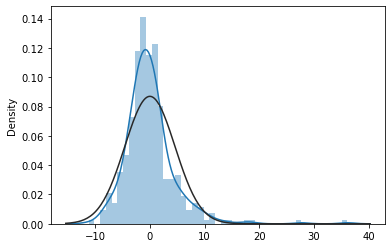

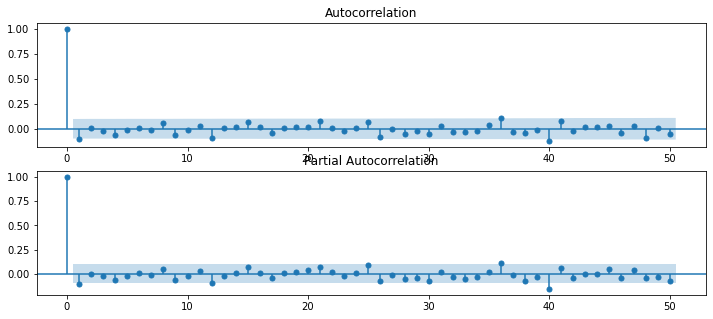

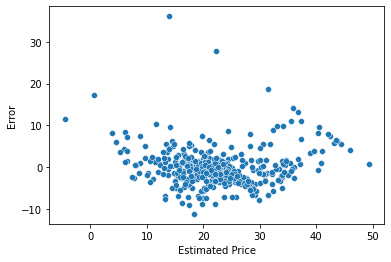

In [172]:
##### Error Analysis(Plot)
# Normal Distribution Analysis
sns.distplot(Resid_tr_reg1, norm_hist='True', fit=stats.norm)
plt.show()

# Autocorrelation Analysis
figure, axes = plt.subplots(2,1,figsize=(12,5))
sm.graphics.tsa.plot_acf(Resid_tr_reg1, lags=50, use_vlines=True, ax=axes[0])
sm.graphics.tsa.plot_pacf(Resid_tr_reg1, lags=50, use_vlines=True, ax=axes[1])
plt.show()

# Heteroscedasticity Analysis
temp = pd.concat([pd.DataFrame(Y_trp_reg1, columns=['Estimated Price']),
                  Resid_tr_reg1.reset_index().iloc[:,[1]]], axis=1)
sns.scatterplot(x='Estimated Price', y='Error', data=temp)
plt.show()

In [173]:
##### Error Analysis(Statistics)
# Checking of Normality
# Null Hypothesis: The residuals are normally distributed
Normality = pd.DataFrame([stats.shapiro(Resid_tr_reg1)], 
                         index=['Normality'], columns=['Test Statistics', 'p-value']).T

# Checking for Autocorrelation
# Null Hypothesis: Autocorrelation is absent
Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1, lags=[10,50])[0], columns=['Test Statistics']),
                             pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1, lags=[10,50])[1], columns=['p-value'])], axis=1).T
Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

# Checking Heteroscedasticity
# Null Hypothesis: Error terms are homoscedastic
Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr_reg1, X_train_fes.values, alternative='two-sided')],
                                  index=['Heteroscedasticity'], 
                                  columns=['Test Statistics', 'p-value', 'Alternative']).T
Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
Error_Analysis

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.86,9.18,50.77,0.73
p-value,0.00,0.51,0.44,0.03
Alternative,nan,nan,nan,two-sided


## Code Summary

In [174]:
### Error analysis
def error_analysis(X_Data, Y_Pred, Residual, graph_on=False):
    if graph_on == True:
        ##### Error Analysis(Plot)
        # Normal Distribution Analysis
        sns.distplot(Residual, norm_hist='True', fit=stats.norm)
        plt.show()

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.graphics.tsa.plot_acf(Residual, lags=50, use_vlines=True, ax=axes[0])
        sm.graphics.tsa.plot_pacf(Residual, lags=50, use_vlines=True, ax=axes[1])
        plt.show()

        # Heteroscedasticity Analysis
        temp = pd.concat([pd.DataFrame(Y_Pred, columns=['Estimated Price']),
                          Residual.reset_index().iloc[:,[1]]], axis=1)
        sns.scatterplot(x='Estimated Price', y='Error', data=temp)
        plt.show()

    ##### Error Analysis(Statistics)
    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Residual)], 
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Residual, X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], 
                                      columns=['Test Statistics', 'p-value', 'Alternative']).T
    Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Error_Analysis
    
    return Error_Analysis

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:39   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1        26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

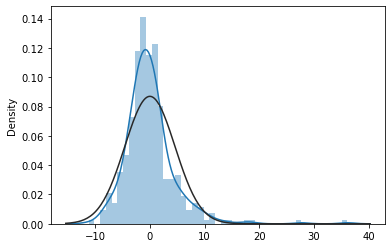

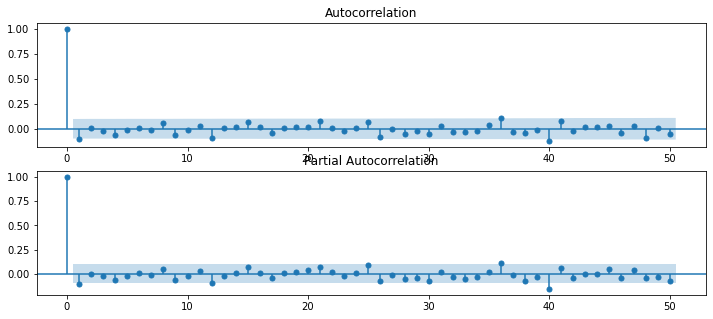

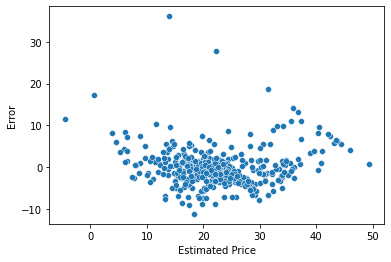

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.86,9.18,50.77,0.73
p-value,0.00,0.51,0.44,0.03
Alternative,nan,nan,nan,two-sided


In [175]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train_fes).fit()
display(algo_reg1.summary())

Y_trp_reg1 = algo_reg1.predict(X_train_fes).values
Y_tep_reg1 = algo_reg1.predict(X_test_fes).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, Y_trp_reg1, Y_test, Y_tep_reg1)
Score_reg1

# Error Analysis
error_analysis(X_train, Y_trp_reg1, Resid_tr_reg1, graph_on=True)

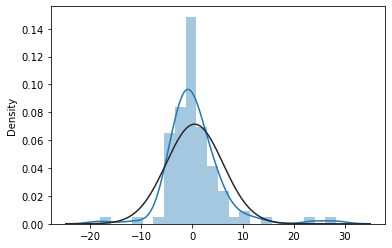

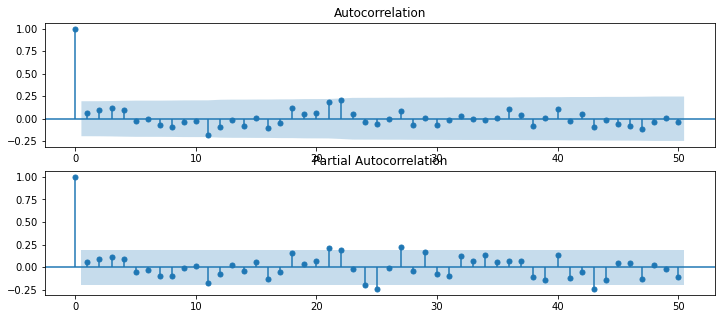

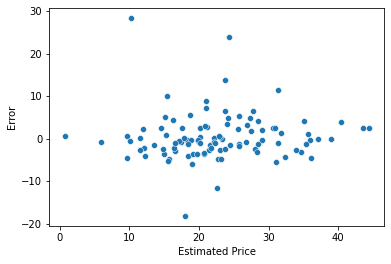

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.83,5.77,41.83,0.12
p-value,0.00,0.83,0.79,0.00
Alternative,nan,nan,nan,two-sided


In [176]:
error_analysis(X_test, Y_trp_reg1, Resid_te_reg1, graph_on=True)

# Summary: insufficient for me
**1) 데이터 핸들링**  

**2) 단계이해**  
>**1. Import Library**  
**2. Data Loading**   
**3. Preprocessing(Rearrange of Data)**   
**4. Applying Base Algorithm**   
**5. Evaluation**  
**6. Error Analysis**  

**3) 결과 해석**  

## Customized Function

In [177]:
### Preprocessing
def prep(df_origin):
    df = df_origin.copy()
    
    # 자료형 변환
    col = []
    if df['ZN'].dtype == 'object':
        for i in df['ZN']:
            col.append(float(i[1:-1]))
        df['ZN'] = col

    col = []
    if df['CHAS'].dtype == 'object':
        for i in df['CHAS']:
            col.append(float(i[1:-1]))
        df['CHAS'] = col

    # 결측값 처리
    for i in df.columns[df.isnull().sum() != 0]:
        if i not in ['INDUS', 'RM']:
            df[i].fillna(df[i].mean(), inplace=True)
        else:
            df[i].fillna(df[i].median(), inplace=True)
            
    return df


def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]
       
    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)
    
    return X_train, X_test, Y_train, Y_test


def feature_engineering(df_origin):
    df = df_origin.copy()
    
    # 데이터 변환
    interval = [100, 200, 300, 400, 500, 600, 700, 800]
    if df['TAX'].max() >= 100:
        df['TAX'] = np.digitize(df['TAX'], bins=interval)
        
    if 'TAX' in df.columns:
        df_dummy = pd.get_dummies(df['TAX'], prefix='TAX', drop_first=True)
        df = pd.concat([df, df_dummy], axis=1)
        del df['TAX']

    df['CHAS'] = df['CHAS'].astype(int)
    if 'CHAS' in df.columns:
        df_dummy = pd.get_dummies(df['CHAS'], prefix='CHAS', drop_first=False)
        df = pd.concat([df, df_dummy], axis=1)
        del df['CHAS']

    if 'CHAS' in df.columns:
        del df['CHAS']
    
    return df


def col_mapping(X_train, X_test):
    X_tr = X_train.copy()
    X_te = X_test.copy()
    
    # checking the difference of columns
    X_te_noncol = [i for i in X_tr.columns if i not in X_te.columns]
    X_tr_noncol = [i for i in X_te.columns if i not in X_tr.columns]

    # duplicates
    if X_te_noncol != []:
        for i in X_te_noncol:
            X_te[i] = 0
            X_te = X_te[X_tr.columns].copy()
            
    if X_tr_noncol != []:
        for i in X_tr_noncol:
            X_tr[i] = 0
            X_tr = X_tr[X_te.columns].copy()
            
    return X_tr, X_te


def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                                  index=X_test.index, columns=X_test.columns)
    
    return X_train_scaling, X_test_scaling


### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    
    return Score, Residual

### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']

    return Score_trte, Residual_tr, Residual_te


### Error analysis
def error_analysis(X_Data, Y_Pred, Residual, graph_on=False):
    if graph_on == True:
        ##### Error Analysis(Plot)
        # Normal Distribution Analysis
        sns.distplot(Residual, norm_hist='True', fit=stats.norm)
        plt.show()

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.graphics.tsa.plot_acf(Residual, lags=50, use_vlines=True, ax=axes[0])
        sm.graphics.tsa.plot_pacf(Residual, lags=50, use_vlines=True, ax=axes[1])
        plt.show()

        # Heteroscedasticity Analysis
        temp = pd.concat([pd.DataFrame(Y_Pred, columns=['Estimated Price']),
                          Residual.reset_index().iloc[:,[1]]], axis=1)
        sns.scatterplot(x='Estimated Price', y='Error', data=temp)
        plt.show()

    ##### Error Analysis(Statistics)
    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Residual)], 
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Residual, lags=[10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Residual, X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], 
                                      columns=['Test Statistics', 'p-value', 'Alternative']).T
    Error_Analysis = pd.concat([Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Error_Analysis
    
    return Error_Analysis

## Default

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              770.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                   2.81e-269
Time:                        13:26:40   Log-Likelihood:                         -1197.5
No. Observations:                 404   AIC:                                      2421.
Df Residuals:                     391   BIC:                                      2473.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1127      0.035     -3.179      0.002      -0.182      -0.043
ZN             0.0384      0.015      2.517      0.012       0.008       0.068
INDUS          0.0397      0.069      0.580      0.562      -0.095       0.174
CHAS           1.3727      1.052      1.305      0.193      -0.696       3.441
NOX           -8.0580      3.570     -2.257      0.025     -15.077      -1.039
RM             7.2127      0.316     22.795      0.000       6.591       7.835
AGE           -0.0301      0.015     -2.043      0.042      -0.059      -0.001
DIS           -1.0721      0.208     -5.159      0.000      -1.481      -0.664
RAD            0.1845      0.069      2.656      0.008       0.048       0.321
TAX           -0.0108      0.004     -2.651      0.008      -0.019      -0.003
PTRATIO       -0.6505      0.119     -5.485      0.000      -0.884      -0.417
B              0.0133      0.003      4.445      0.000       0.007       0.019
LSTAT         -0.2352      0.055     -4.286      0.000      -0.343      -0.127
==============================================================================
Omnibus:                      245.319   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3412.507
Skew:                           2.310   Prob(JB):                         0.00
Kurtosis:                      16.468   Cond. No.                     8.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,3.11,21.99,16.78
Test,3.64,34.08,17.51


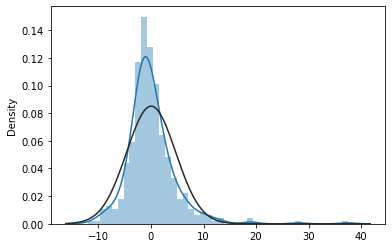

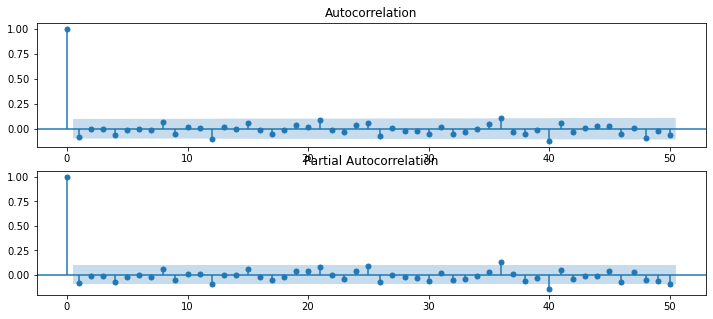

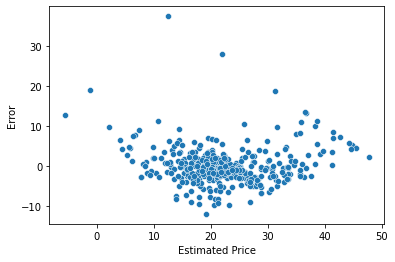

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.85,8.11,51.81,0.70
p-value,0.00,0.62,0.40,0.01
Alternative,nan,nan,nan,two-sided


In [178]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

# X_train_fe = feature_engineering(X_train)
# X_test_fe = feature_engineering(X_test)
# X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

# scaler = preprocessing.MinMaxScaler()
# X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train).fit()
display(algo_reg1.summary())

Y_trp_reg1 = algo_reg1.predict(X_train).values
Y_tep_reg1 = algo_reg1.predict(X_test).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, Y_trp_reg1, Y_test, Y_tep_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_train, Y_trp_reg1, Resid_tr_reg1, graph_on=True)

## With Feature Engineering

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:41   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1098      0.035     -3.122      0.002      -0.179      -0.041
ZN             0.0361      0.015      2.345      0.020       0.006       0.066
INDUS         -0.0393      0.072     -0.548      0.584      -0.180       0.102
NOX          -14.1708      4.451     -3.184      0.002     -22.922      -5.420
RM             6.2672      0.466     13.453      0.000       5.351       7.183
AGE           -0.0338      0.015     -2.294      0.022      -0.063      -0.005
DIS           -1.2884      0.226     -5.691      0.000      -1.733      -0.843
RAD            0.4776      0.185      2.586      0.010       0.114       0.841
PTRATIO       -0.8674      0.148     -5.874      0.000      -1.158      -0.577
B              0.0105      0.003      3.387      0.001       0.004       0.017
LSTAT         -0.2858      0.057     -5.010      0.000      -0.398      -0.174
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        17.1128      6.061      2.824      0.005       5.197      29.029
CHAS_1        18.6594      6.201      3.009      0.003       6.468      30.850
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,3.07,21.05,16.33
Test,3.51,31.34,16.76


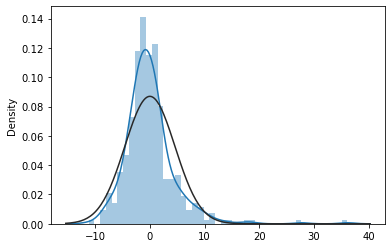

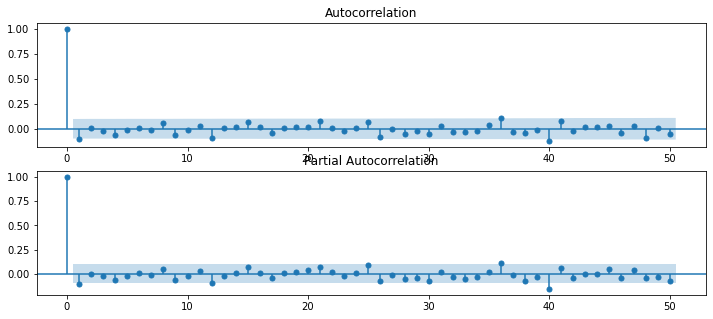

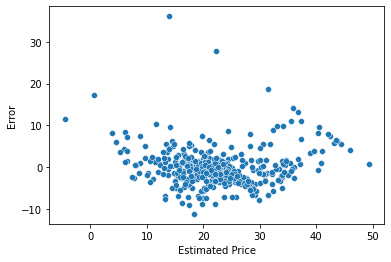

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.86,9.18,50.77,0.73
p-value,0.00,0.51,0.44,0.03
Alternative,nan,nan,nan,two-sided


In [179]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

# scaler = preprocessing.MinMaxScaler()
# X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train_fe).fit()
display(algo_reg1.summary())

Y_trp_reg1 = algo_reg1.predict(X_train_fe).values
Y_tep_reg1 = algo_reg1.predict(X_test_fe).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, Y_trp_reg1, Y_test, Y_tep_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_train, Y_trp_reg1, Resid_tr_reg1, graph_on=True)

## With Feature Engineering and Scaling

(404, 13) (404, 1)
(102, 13) (102, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     68.67
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.71e-105
Time:                        13:26:42   Log-Likelihood:                -1188.7
No. Observations:                 404   AIC:                             2413.
Df Residuals:                     386   BIC:                             2486.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -9.7685      3.129     -3.122      0.002     -15.921      -3.616
ZN             3.6059      1.538      2.345      0.020       0.583       6.629
INDUS         -1.0711      1.956     -0.548      0.584      -4.917       2.774
NOX           -6.8870      2.163     -3.184      0.002     -11.140      -2.634
RM            28.7478      2.137     13.453      0.000      24.546      32.949
AGE           -3.1799      1.386     -2.294      0.022      -5.906      -0.454
DIS          -14.1170      2.480     -5.691      0.000     -18.994      -9.240
RAD           10.9837      4.247      2.586      0.010       2.633      19.334
PTRATIO       -8.1534      1.388     -5.874      0.000     -10.882      -5.424
B              4.1760      1.233      3.387      0.001       1.752       6.600
LSTAT        -10.0753      2.011     -5.010      0.000     -14.029      -6.122
TAX_2         -5.2255      1.405     -3.719      0.000      -7.988      -2.463
TAX_3         -5.7704      1.463     -3.945      0.000      -8.646      -2.894
TAX_4         -5.2109      1.538     -3.389      0.001      -8.234      -2.187
TAX_6        -13.2573      4.293     -3.088      0.002     -21.697      -4.817
TAX_7         -6.4422      2.668     -2.414      0.016     -11.688      -1.196
CHAS_0        24.9203      2.976      8.374      0.000      19.069      30.771
CHAS_1        26.4669      3.197      8.279      0.000      20.181      32.753
==============================================================================
Omnibus:                      241.516   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.749
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      15.823   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,MAE,MSE,MAPE
Train,3.07,21.05,16.33
Test,3.51,31.34,16.76


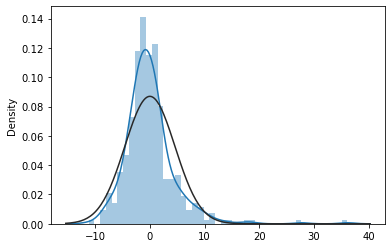

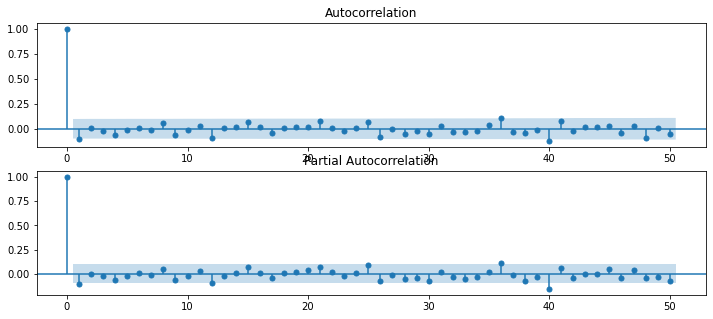

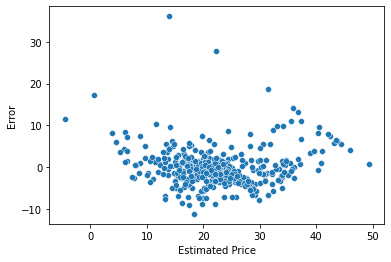

,Normality,Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,0.86,9.18,50.77,0.73
p-value,0.00,0.51,0.44,0.03
Alternative,nan,nan,nan,two-sided


In [180]:
# Data Loading
location = r'.\Data\BostonHousingPrice\Price_Modify_KK.csv'
df = pd.read_csv(location)

# Preprocessing
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Regression
algo_reg1 = sm.OLS(Y_train, X_train_fes).fit()
display(algo_reg1.summary())

Y_trp_reg1 = algo_reg1.predict(X_train_fes).values
Y_tep_reg1 = algo_reg1.predict(X_test_fes).values

# Evaluation
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, Y_trp_reg1, Y_test, Y_tep_reg1)
display(Score_reg1)

# Error Analysis
error_analysis(X_train, Y_trp_reg1, Resid_tr_reg1, graph_on=True)